In [123]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
#importing csv file
titanic = pd.read_csv (r'E:\The_Scrapers\Palak_Paneer\train.csv')
titanic.head(10)
titanic.shape

(891, 12)

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


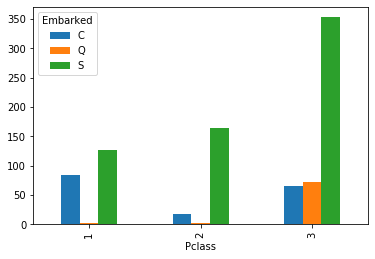

In [125]:
#grouping passengers by Pclass,Embark and then plotting for count of passengers

#pclass_by_place = titanic.groupby(['Pclass','Embarked'])['PassengerId'].count()
#print(pclass_by_place)
pclass_by_place_plot = titanic.groupby(['Pclass','Embarked'])['PassengerId'].count().unstack('Embarked')
pclass_by_place_plot.plot.bar()
#pclass_by_place_plot.plot.bar(stacked='true')
pclass_by_place_plot

        count  sum  %survival
Pclass                       
1         216  136  62.962963
2         184   87  47.282609
3         491  119  24.236253


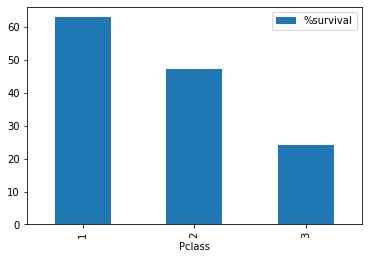

In [126]:
#Survival rate for each Pclass and then plot

sur_rate_pclass = titanic.groupby('Pclass')['Survived'].agg(['count','sum'])
sur_rate_pclass['%survival'] = sur_rate_pclass['sum']/sur_rate_pclass['count']*100
print(sur_rate_pclass)
sur_rate_pclass.plot.bar(y='%survival')

       count  sum  %survival
Parch                       
0        678  233  34.365782
1        118   65  55.084746
2         80   40  50.000000
3          5    3  60.000000
4          4    0   0.000000
5          5    1  20.000000
6          1    0   0.000000


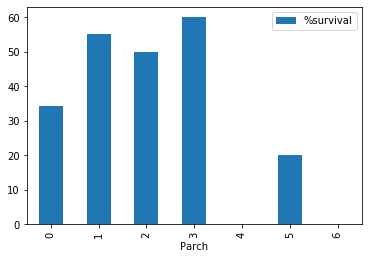

In [127]:
#Survival rate for each Parch and then plot

sur_rate_parch = titanic.groupby('Parch')['Survived'].agg(['count','sum'])
sur_rate_parch['%survival'] = sur_rate_parch['sum']/sur_rate_parch['count']*100
print(sur_rate_parch)
sur_rate_parch.plot.bar(y='%survival')

       count  sum  %survival
SibSp                       
0        608  210  34.539474
1        209  112  53.588517
2         28   13  46.428571
3         16    4  25.000000
4         18    3  16.666667
5          5    0   0.000000
8          7    0   0.000000


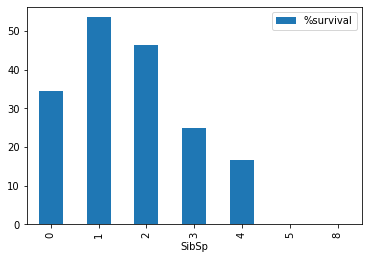

In [128]:
#Survival rate for each SibSp and then plot

sur_rate_sibsp = titanic.groupby('SibSp')['Survived'].agg(['count','sum'])
sur_rate_sibsp['%survival'] = sur_rate_sibsp['sum']/sur_rate_sibsp['count']*100
print(sur_rate_sibsp)
sur_rate_sibsp.plot.bar(y='%survival')

In [129]:
titanic['tot_fam'] = titanic['Parch'] + titanic['SibSp']
sur_rate_fam = pd.DataFrame(titanic.groupby(['tot_fam','Pclass'])['Survived'].agg(['count','sum']).reset_index())
sur_rate_fam['%survival'] = sur_rate_fam['sum']/sur_rate_fam['count']*100
sur_rate_fam

,tot_fam,Pclass,count,sum,%survival
0,0,1,109,58,53.211009
1,0,2,104,36,34.615385
2,0,3,324,69,21.296296
3,1,1,70,51,72.857143
4,1,2,34,18,52.941176
5,1,3,57,20,35.087719
6,2,1,24,18,75.000000
7,2,2,31,21,67.741935
8,2,3,47,20,42.553191
9,3,1,7,5,71.428571


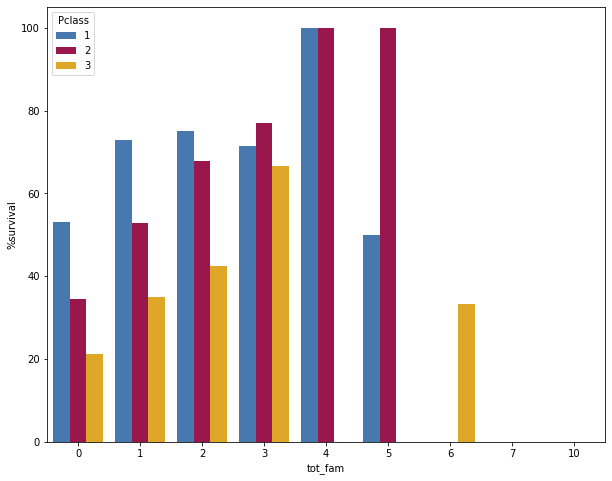

In [130]:
plt.figure(figsize=(10,8))

sns.barplot(x="tot_fam", hue="Pclass", y='%survival', data=sur_rate_fam, ci=None,
              palette = sns.xkcd_palette(["windows blue", "raspberry", "amber"]))

        Parch  SibSp
Pclass              
1          77     90
2          70     74
3         193    302


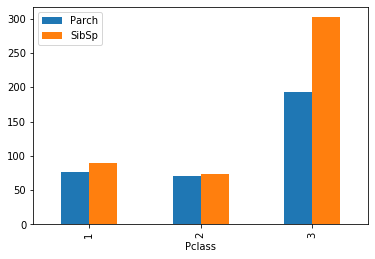

In [131]:
#Parents&Children and Siblings&Spouse totals in each Pclass

#NOTE: Family members are being considered more than once for each family member, hence not an accurate depiction

parchsibsp_by_pclass= titanic.groupby(['Pclass'])['Parch','SibSp'].sum()
print(parchsibsp_by_pclass)
parchsibsp_by_pclass.plot.bar()
#pclass_by_place_plot.plot.bar(stacked='true')
#print(pclass_by_place)

In [132]:
#create dummy variable for sex

dummy_sex = pd.get_dummies(titanic['Sex'])
titanic = pd.concat([titanic, dummy_sex], axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tot_fam,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,0


In [133]:
#create dummy variable for embarked 

dummy_embark = pd.get_dummies(titanic['Embarked'])
titanic = pd.concat([titanic, dummy_embark], axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tot_fam,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,0,1,0,0


In [134]:
#create dummy variable for Pclass 

dummy_pclass = pd.get_dummies(titanic['Pclass'])
titanic = pd.concat([titanic, dummy_pclass], axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,tot_fam,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,0,1,0,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,0,1,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,4,0,1,0,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,2,1,0,0,0,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,1,0,1,0,0,0,1,0


In [135]:
titanic_float = titanic[[    'Survived',      'Pclass',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Fare',
            'female',        'male',     'tot_fam',             1,             2,
                   3]]
titanic_float.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male,tot_fam,1,2,3
0,0,3,male,22.0,1,0,7.2500,0,1,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,1,1,0,0
2,1,3,female,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,1,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,0,1,0,0,0,1


In [136]:
titanic_float.rename(columns={1:'class_1', 2:'class_2', 3:'class_3'}, inplace=True)

In [137]:
titanic_float.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male,tot_fam,class_1,class_2,class_3
0,0,3,male,22.0,1,0,7.2500,0,1,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,1,1,0,0
2,1,3,female,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,1,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,0,1,0,0,0,1


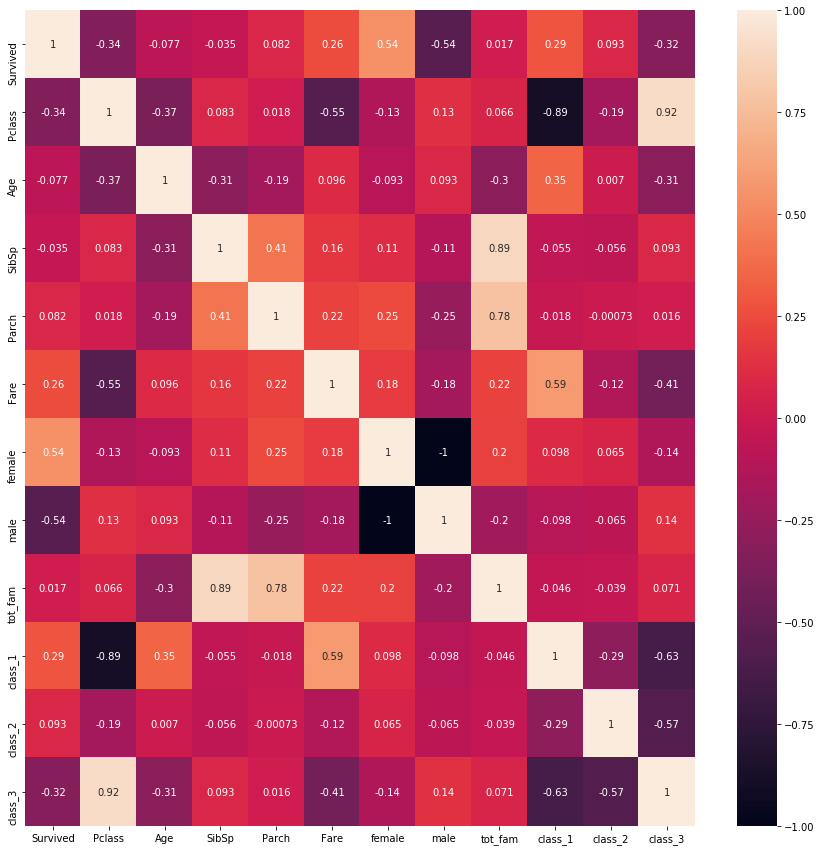

In [138]:
corr_matrix = titanic_float.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)

In [139]:
#next steps
#remove cabin col, then remove for empty obs. and get data ready for random forest

# drop Cabin
titanic_1 = titanic.drop('Cabin',
               axis = 1)
   
# show the dataframe
titanic_1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,0,0,1


In [159]:
titanic_2 = titanic_1.dropna(how='any')

In [ ]:
#so, titanic_1 does not have Cabin column titanic_2 builds on that and also drops any row that has an empty cell

In [162]:
titanic.shape

(891, 21)

In [163]:
titanic_1.shape

(891, 20)

In [164]:
titanic_2.shape

(712, 20)